# Python Project--Written Digit Recognizer
- Ziyin Wang

- UNI:ZW2605

- Email:zw2605@columbia.edu

## Abstract







I'm very interested in supervised classifiction problem in machine learning, which has a lot of applications in real world, like facial recognition, automatic pilot and so on. In this project, I want to analyze the simple digit recogniton by neural network.I will start with the simplest softmax regression, also is known as the generalization of logistic regression,which only contains the input layer and the output layer. Then I will update the softmax by adding one hidden layer to make it a simple neural network. And finally, introduce convolution into the neural network to make it become the convolutional neural network, which is popular in image recognition

## Main Body

### 1 Data Preprocessing
- In this project, we use the most famous handwritten digits dataset MINIST (http://yann.lecun.com/exdb/mnist/), which is a subset of a larger data from NIST(National Institute of Standards and Technology).There are four parts in the MINIST, train set images, train set labels, test set images, test set labels.Train set images contains 60000 picutres of handwritten digits from '0-9',which are written by 250 persons. Half are high school students, half are employees from the Census Bureau.Similarly,test set images contains 10000 pictures.And the set labels dataset contain the corresponding value of the picture


In [303]:
import numpy as np
import pandas as pd
import scipy
import os
import struct
import matplotlib.pyplot as plt
%matplotlib inline

- Since the data is stored in bytes, we have to load it to NumPy Array first, which is needed for training and testing.In the dataset, each image is consist of 28*28 pixels and each pixel is represented by a gray value varying from 0 to 255.The content of the training label and training image are as follows

In [304]:
def get_mnist(file,kind='train'):
    #Extract the path of local files
    label_path=os.path.join(file,kind+'-labels-idx1-ubyte')
    image_path=os.path.join(file,kind+'-images-idx3-ubyte')
    
    with open(label_path,"rb") as path:
        #Load first eight rows of label set
        magic,n=struct.unpack('>II',path.read(8))
        #Transfer labels from unsigned byte to an array
        labels=np.fromfile(path,dtype=np.uint8)
    
    with open (image_path,"rb") as path:
        #Load first sixteen rows of image set
        magic,num,rows,cols=struct.unpack('>IIII',path.read(16))
        #Transfer each image to a one-dimensional array with 784 elements 
        images=np.fromfile(path,dtype=np.uint8).reshape(len(labels),784)
        
    return(images,labels)

In [305]:
#Local file path
filename='/Users/ouazusatane/Desktop/2019Fall/Programming Language-Python/Project'

#Load training data
train_data=get_mnist(filename)
#Load testing data
test_data=get_mnist(filename,kind='t10k')

#Split labels and images
train_image,train_label=train_data
test_image,test_label=test_data


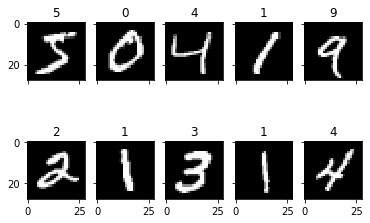

In [306]:
#To get familiar with how the image looks like, let's visualize them first

#Create a plot axs which contains ten subplot
fig, axs = plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)

#plot the first ten images and corresponding labels
for ax,image,label in zip(axs.flat, train_image,train_label):
    ax.imshow(image.reshape(28,28), cmap='gray')
    ax.set_title(str(label))


### 2.1 Elementary Model-Softmax Regression
- Softmax Regression is a generalization of logistic regression which can solve the multivariate classification. Besides, softmax can also be considered as an one-layer neural network. Below is the Sketch Map of softmax regression.<img src="111.png" width="50%">



- As is shown in the picture above.The softmax function transfer the net input into probability.The response variable $y_{i}\in{1,2,...,K}$where $K$ is the number of classes. If we have $m$ training set $\{(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{m},y_{m})\}$, we need to estimate the probability of the class label taking on each of the $K$ different possible values. Then we can get a $K$ dimensional vector:

<center>$h_{w}x=\begin{bmatrix}P(y=1|x;w)\\P(y=2|x;w)\\...\\P(y=K|x;w)\end{bmatrix}=\frac{1}{\sum\limits_{j=1}^{K}exp(w^{(j)T}*x)}\begin{bmatrix}exp(w^{(1)T}x)\\exp(w^{(2)T}x)\\...\\exp(w^{(K)T}x)\end{bmatrix}$<center>
  
- And the net input is the linear combination of independent variables (here,the numer is 784), and the weights, which is the parameters that we need to adjust to train model . Since the number of weights is pretty large here, it is OK not to take bias into consideraion.We get the net input $Z$:


<center>$Z=\sum\limits_{i=1}^{n}w_{i}*x_{i}=W^{T}*X$<center>


- Besides, we need to define a cost function to minimize to get the best solution. Like in logistic regression, the cost funciton is literally the negative log likelihood function,which is based on cross entropy:

   <center>$J(W)=-\frac{1}{n}\sum\limits_{i=1}^{n}H(T_{i},O_{i})$<center>
   
   <center>$H(T_{i},O_{i})=-\sum\limits_{m}T_{i}*log(O_{i})$<center>
    
- Here,the $T_{i}$ is the indicator function which equals 1 when $y_{i}\neq0$,and $O$ is the output of softmax.
    



In [307]:
##Each image is a 784 dimensional vector, and there are 10 possible output
input_num=784
output_num=10

##Build the initial weights matrix "W"
W=np.zeros(input_num*output_num).reshape(input_num,output_num)

In [308]:
###First,define linear combination,the ouput Z is a 60000*10 matrix
def linear_output(X,w):
    ###add intercept
    Z=X.dot(w)
    return(Z)


In [309]:
###Define softmax function, the output of softmax here is probability, the input is the net input
def softmax(z):
    return(np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True))

In [310]:
###We need to convert our integer label into a one-hot varient for convenience
###Here, the raw train_label is 60000 integers, and the one-hot varient is 60000*10 matrix
def to_one_hot(y):
    one_hot_y=[]
    for item in y:
        one_hot=[0]*10
        one_hot[item]=1
        one_hot_y.append(one_hot)
    return(np.array(one_hot_y))     

In [311]:
###Have a look at one-hot y
to_one_hot(train_label)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [312]:
###Define cross entropy function
###Pro is the output of softmax function, and y_target is the one-hot y
def cross_entropy(pro,y_target):
    return(-np.sum(y_target*np.log(pro),axis=1))

In [313]:
###Define cost function
def cost_func(pro,y_target):
    return(np.mean(cross_entropy(pro,y_target)))

- After having the cost function, we also need to choose a way to update our weights. We choose gradient descent here which is a very common but useful to optimize the target.The derivate of cost function is:
<center>$\bigtriangledown W_{j} J(W)=\frac{1}{n}\sum\limits_{i=1}^{n}[x^{(i)}(O_{i}-T_{i}]$<center>
    
- Then we can update the weights w in the opposite direction of cost gradient with learning rate $\eta$:
<center>$W_{j}=W_{j}-\eta*J(W)$<center>
<center>$j \in {1,2,...k}$<center>

In [314]:
###Define gradient function for weights "W"
def grad_weight(prob,y_target,x):
    m=x.shape[0]
    return(-1/m*np.dot(x.T,(y_target-prob)))


In [315]:
###To know how good our model is, we need to define a funciton to get accuracy
def get_accuracy(y_hat,y):
    pred=np.argmax(y_hat,axis=1)
    return(sum(pred==y)/len(y))

In [316]:
###Define training function
def train_model(x,y,threshold=0.01,iterations=1000,learning_rate=1e-5):
    w=np.zeros(input_num*output_num).reshape(input_num,output_num)
    t=0
    y_to_one_hot=to_one_hot(y)
    
    losses=[]
    for i in range(0,iterations):
        t=t+1
        z=linear_output(x,w)
        prob=softmax(z)
        loss=cost_func(prob,y_to_one_hot)
        grad_w=grad_weight(prob,y_to_one_hot,x)
        losses.append(loss)
        w=w-learning_rate*grad_w
    return(w,losses)
        

In [317]:
###Train model,get updated weights and a list of loss
W,Losses=train_model(train_image,train_label)

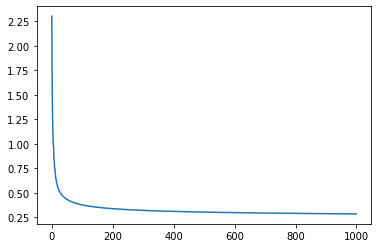

In [318]:
plt.plot(Losses)

In [319]:
get_accuracy(softmax(linear_output(train_image,W)),train_label)

0.9210166666666667

In [320]:
score_softmax=get_accuracy(softmax(linear_output(test_image,W)),test_label)

In [321]:
print(" score: {:.6f}".format(score_softmax))

 score: 0.920800


- It is obvious that the cost fucntion decreases as we update weights.
- And the train accuracy and test accuracy are both very good, the prediction accuracy is 92.10% and 92.08%.

### 2.2 Compared With Support Vector Machine

- Support vector machine(SVM) is a very popular method in dealing with classification problem. Here we use sklearn package to see how SVM predict the MNIST data.

In [322]:
from sklearn.svm import SVC

In [323]:
###choose the kernel as polynomial
clf = SVC(kernel = 'poly')
###train svm model
clf.fit(train_image, train_label) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [324]:
###test svm model
score_svm = clf.score(test_image, test_label)
print(" score: {:.6f}".format(score_svm))

 score: 0.978700


- It is obvious that the test accuracy of svm model is 97.87%, much higher than our softmax regression. Then we need to improve our softmax model.

### 2.3 Neural Network 
- As is said in 2.1, the softmax in general is an one-layer neural network. In order to get higher test accuracy, we can add more layers, transforming the softmax into a multi-layer neural network. Here,we just add one hidden layer between net input and softmax.

In [325]:
###we use tensorflow to realize neural network
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /opt/anaconda3/lib/python3.7/site-packages (2.0.0)


In [326]:
import tensorflow as tf

In [327]:
###There exist mnist dataset in tensorflow.
###For neural network, we need to adjust the structure of train data and test data 
mnist = tf.keras.datasets.mnist
(train_image2, train_label2), (test_image2, test_label2) = mnist.load_data()
train_image2, test_image2 = train_image2 / 255.0, test_image2 / 255.0

In [328]:
###The structure of train image is a 60000*28*28 array
train_image2.shape

(60000, 28, 28)

In [329]:
###neural network
###Set layers
model_nn = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


model_nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy']
              )

###train model
model_nn.fit(train_image2, train_label2, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2983 - sparse_categorical_accuracy: 0.9135
Epoch 2/8
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1427 - sparse_categorical_accuracy: 0.9576
Epoch 3/8
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1082 - sparse_categorical_accuracy: 0.9669
Epoch 4/8
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0920 - sparse_categorical_accuracy: 0.97135s -  - ETA: 2s - loss: 
Epoch 5/8
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0759 - sparse_categorical_accuracy: 0.9761
Epoch 6/8
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0679 - sparse_categorical_accuracy: 0.9788
Epoch 7/8
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0596 - sparse_categorical_accuracy: 0.9808
Epoch 8/8
60000/60000 [==============================] - 5s 88us/sample - loss

In [330]:
score_nn=model_nn.evaluate(test_image2, test_label2)[1]

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [331]:
print(" score: {:.6f}".format(score_nn))

 score: 0.978700


- When we add one hidden layer to softmax model, the accuracy of test data changes from 92.08% to 97.87%, which is almost the same as the SVM model.

### 2.4 Convolutional Neural Network
- Convolutional neural network(CNN) is one of the most popular method in deep learning. The structure of CNN is similar to neural network, but it is much suitbale for image recognition. We introduce convolution into our neural network, and it will become a complicated CNN.

In [332]:
###Set layers and parameter
cnn = tf.keras.models.Sequential([
    ###Add convolution
  tf.keras.layers.Conv2D(6, (3, 3), input_shape=(28, 28, 1), activation="relu"),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dense(84, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

###Define optimizer, loss, accuracy
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy']
              )

###Train model
cnn.fit(np.expand_dims(train_image2, 3), train_label2, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 21s 345us/sample - loss: 0.1924 - sparse_categorical_accuracy: 0.9413
Epoch 2/8
60000/60000 [==============================] - 19s 325us/sample - loss: 0.0653 - sparse_categorical_accuracy: 0.9796
Epoch 3/8
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0474 - sparse_categorical_accuracy: 0.9851
Epoch 4/8
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0361 - sparse_categorical_accuracy: 0.9885
Epoch 5/8
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0297 - sparse_categorical_accuracy: 0.9905
Epoch 6/8
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0252 - sparse_categorical_accuracy: 0.9917
Epoch 7/8
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0206 - sparse_categorical_accuracy: 0.9934
Epoch 8/8
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0173

In [333]:
score_cnn=cnn.evaluate(np.expand_dims(test_image2, 3), test_label2)[1]

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [334]:
print(" score: {:.6f}".format(score_cnn))

 score: 0.987200


- The test accuracy of CNN has exceeded the result of SVM model

## Conclusion

- The result from Softmax Regression, Neural Network and Convolutional Neural Network are both pretty good. And the score of CNN is even higher than the score of SVM
- Since in this project we only deal with the greyscale images with 28 by 28 pixels, the test score of softmax is beyond 90%. Actually, if we need to deal with the colorset of some complicated images, the score of softmax might not be that high. However, as we can see in the project, the score of CNN > the score of NN > the score of softmax. Then, we can use CNN to deal with complicated images

- Reference:

http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/

http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d